In [20]:
## Import packages here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import lime.lime_tabular

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance, plot_partial_dependence

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\inspection\__init__.py)

In [4]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/hr_new_job_processed.csv"
job_df=pd.read_csv(url)

In [5]:
job_df.to_csv("hr_new_job_processed.csv", index=False)

In [6]:
job_df.head()

,city_development_index,training_hours,company_size,experience,education_level,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
0,0.698000,43.000000,2.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.624000,204.000000,4.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.815687,14.317001,3.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.903874,18.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.624000,111.000000,0.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504 entries, 0 to 11503
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            11504 non-null  float64
 1   training_hours                    11504 non-null  float64
 2   company_size                      11504 non-null  float64
 3   experience                        11504 non-null  float64
 4   education_level                   11504 non-null  float64
 5   company_type_Early Stage Startup  11504 non-null  float64
 6   company_type_Funded Startup       11504 non-null  float64
 7   company_type_NGO                  11504 non-null  float64
 8   company_type_Other                11504 non-null  float64
 9   company_type_Public Sector        11504 non-null  float64
 10  company_type_Pvt Ltd              11504 non-null  float64
 11  target                            11504 non-null  float64
dtypes: f

In [8]:
X = job_df.loc[:, job_df.columns != 'target']
y = job_df[['target']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12)
black_box_model = RandomForestClassifier(random_state=123, max_depth=25, max_features=10, n_estimators=10, bootstrap=True)

In [10]:
black_box_model.fit(X_train, y_train)

f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=25, max_features=10, n_estimators=10,
                       random_state=123)

In [11]:
y_blackbox = black_box_model.predict(X_test)
metrics.roc_auc_score(y_test, y_blackbox)

0.7983602160692025

In [12]:
from sklearn.inspection import permutation_importance


feature_importances = permutation_importance(estimator=black_box_model, X = X_train, y = y_train, n_repeats=5,
                                random_state=123, n_jobs=2)

In [13]:
feature_importances.importances.shape

(11, 5)

In [14]:
feature_importances.importances

array([[0.29642508, 0.2950125 , 0.29381723, 0.29131805, 0.29370857],
       [0.15245029, 0.14951646, 0.14973378, 0.15223297, 0.15310225],
       [0.17635554, 0.18646094, 0.18483103, 0.18363577, 0.18852548],
       [0.15636206, 0.15484081, 0.15190699, 0.15234163, 0.15907856],
       [0.11300663, 0.11083342, 0.11094208, 0.10866022, 0.1106161 ],
       [0.00130392, 0.00141258, 0.00152124, 0.00130392, 0.00119526],
       [0.00336847, 0.00271651, 0.00325981, 0.00358579, 0.00380311],
       [0.00097794, 0.00097794, 0.00086928, 0.00076062, 0.00097794],
       [0.00097794, 0.00097794, 0.00086928, 0.00076062, 0.00086928],
       [0.01054004, 0.01162664, 0.00999674, 0.01130066, 0.01162664],
       [0.05193958, 0.0510703 , 0.05096164, 0.05117896, 0.05324351]])

In [15]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

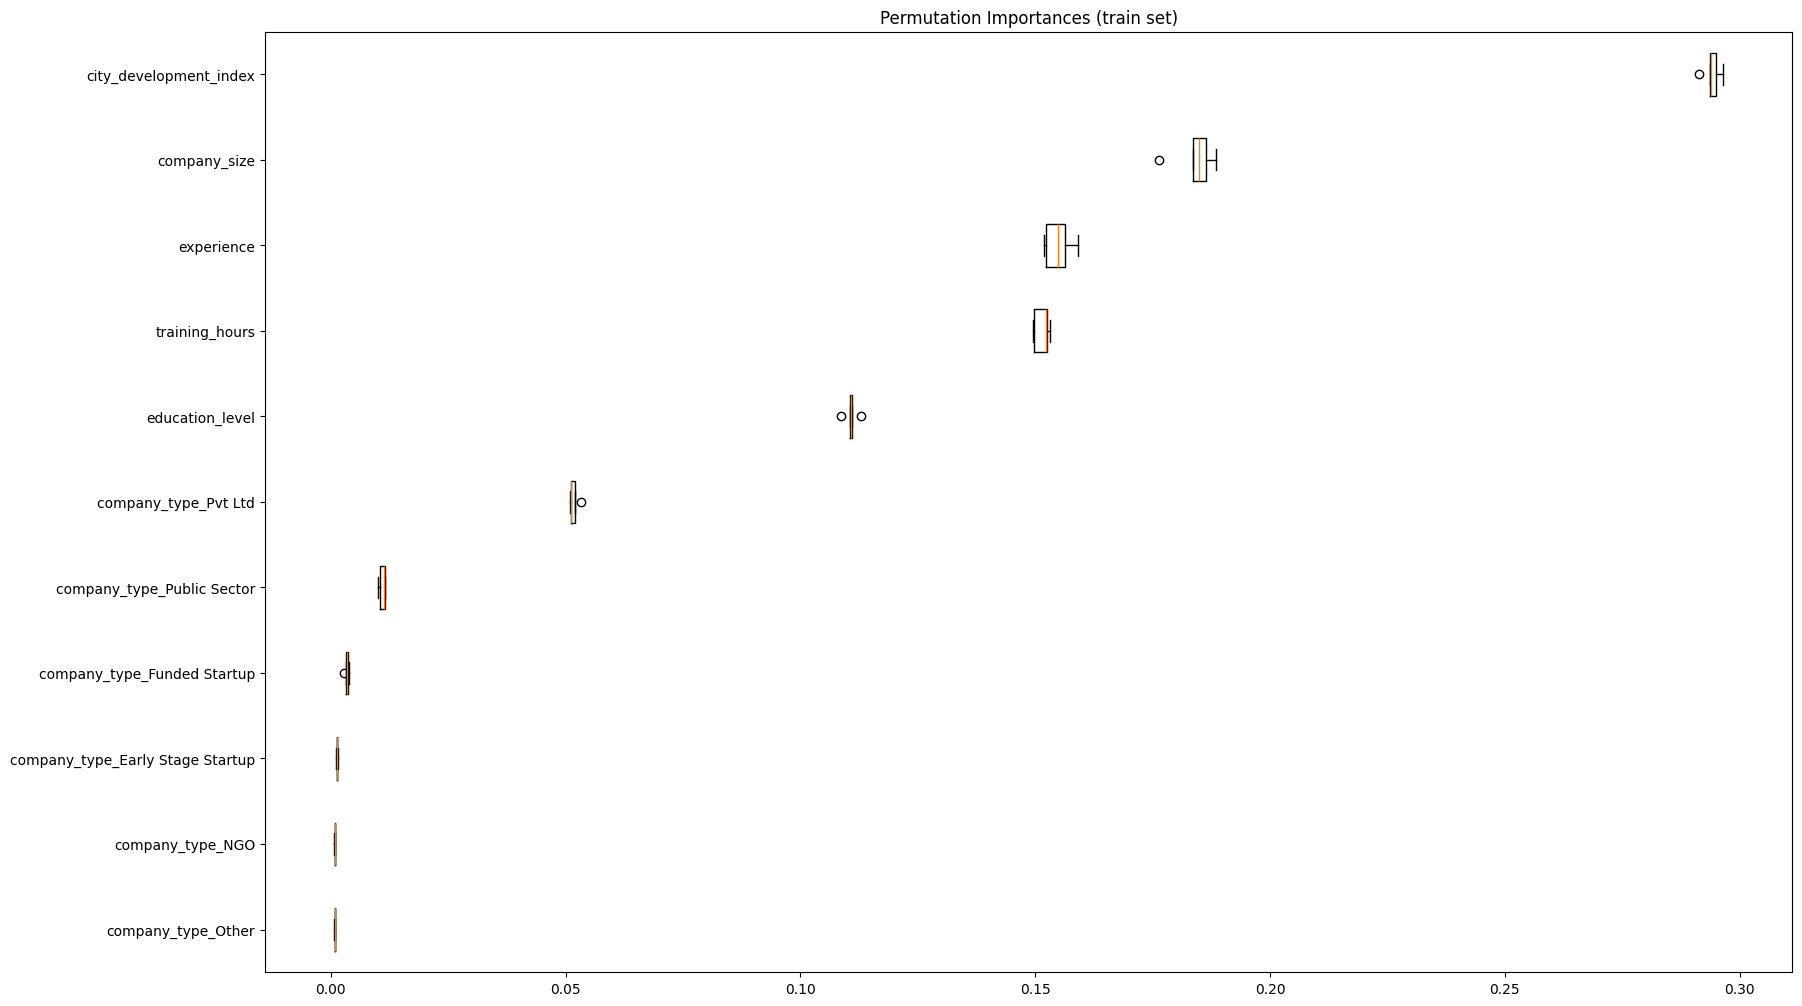

In [16]:
visualize_feature_importance(feature_importances)

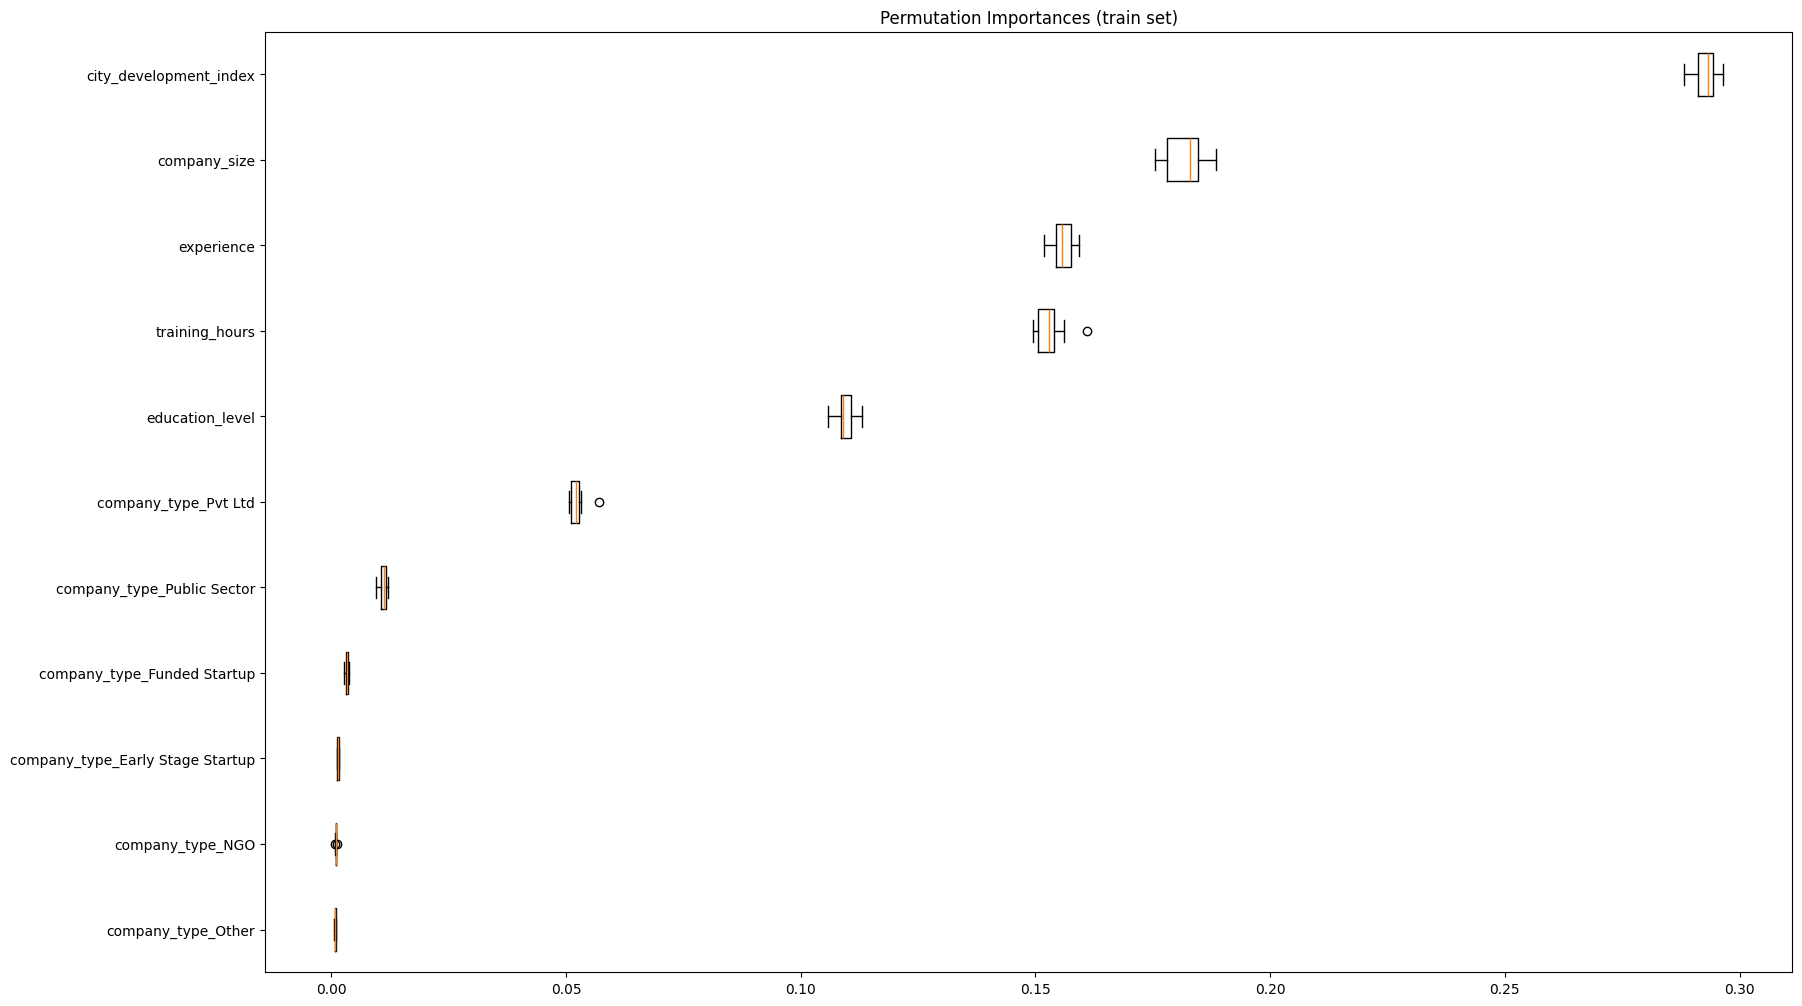

In [17]:
feature_importances = permutation_importance(estimator=black_box_model, X = X_train, y = y_train, n_repeats=10,
                                random_state=123, n_jobs=2)
visualize_feature_importance(feature_importances)

In [18]:
# Important features
important_features = ['city_development_index', 'experience']
"arguments: "
" - estimator: the black box model"
" - X is the training data X"
" - features are the important features we are interested"
plot_partial_dependence(estimator=black_box_model, 
                        X=X_train, 
                        features=important_features,
                        random_state=123)

NameError: name 'plot_partial_dependence' is not defined